# Multiple Linear Regression using Python
In this notebook we will solve a Multiple Linear Regression problem using Python programming language. In order to do this we will use some commonly used libraries for solving machine learning tasks, these includes Pandas, Numpy, Matplotlib and Scikit-learn.

## Task 1:

Suppose we want to determine the price per unit area of a house in a dataset of historical purchases made in an area in which we have multiple features such as __*transaction_number, transaction_date, house_age, distance_to_nearest_bus_station, number_of_convenience_stores, latitude, and longitude.*__


The objective of this task is to train a ML regression model that can accurately predict the price per unit area of a given house.

![alt text](img/real_estate.jpg "Real Estate")

### Step 1: Importing Libraries for our task

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### 2. Reading the data from the provided file
Since the data is in a CSV format, we are going to read this file using the pandas's read_csv method

In [2]:
df = pd.read_csv('dataset/03-real_estate_dataset.csv')

### 3. Exploring the data 
Let us explore the data 

In [3]:
df.shape

(414, 8)

In [4]:
df.head()

,number,transaction_date,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.describe()

,number,transaction_date,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


After exploring our data, we can use our intuition, to drop some of the features that might have no contribution to our model

In [6]:
df = df.drop('number', axis=1)
df = df.drop('transaction_date', axis=1)
df.head()

,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


### 4. Splitting the data into training and test sets

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:,df.shape[1]-1]

In [8]:
X.head()

,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### 5. Building the model to fit the training data

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### 6. Using the model to make predictions for the test data set 

In [11]:
y_pred = model.predict(X_test)

In [12]:
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = -1194.2145132626354
w = [-2.65600030e-01 -4.74964456e-03  1.13434674e+00  2.28565503e+02
 -3.67741638e+01]


### 7. Evaluating our model performance

In [13]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 66.75
Coefficient of determination: 0.58


We can use our model to make different kinds of predictions as follows

In [ ]:
data = {
'house_age':[32.0],
'distance_to_nearest_bus_station': [84.87882],
'number_of_convenience_stores':[10],
'latitude':[24.98298],
'longitude':[121.54024],
}

data = pd.DataFrame(data)
val = model.predict(data)
print(val)

[48.93331686]


## Task 2
The aim of this task is to build a model which predicts sales based on the money spent on different platforms such as TV, radio, and newspaper for marketing by using Simple Linear Regression and Multiple Linear Regression. The dataset contains the following features ***TV, Radio, Newspaper*** and the target column is ***Sales*** 

Hint: _For Simple Linear Regression, select the feature with the highest correlation with the target column._

Compare the Mean Squared error and Coefficient of determination for both models

In [1]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#reading data
df = pd.read_csv('04-advertising_dataset.csv')

In [3]:
#exploring data
df.shape

(200, 4)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
#Spliting the dataset for simple linear regression
X = df.iloc[:, :1]
y = df.iloc[:, 3]
#Spliting the datasets train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.25,random_state = 42)
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [7]:
#Building the model to fit the training data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [8]:
y_pred = model.predict(X_test)
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = 7.007108428241851
w = [0.05548294]


TypeError: can only concatenate str (not "int") to str

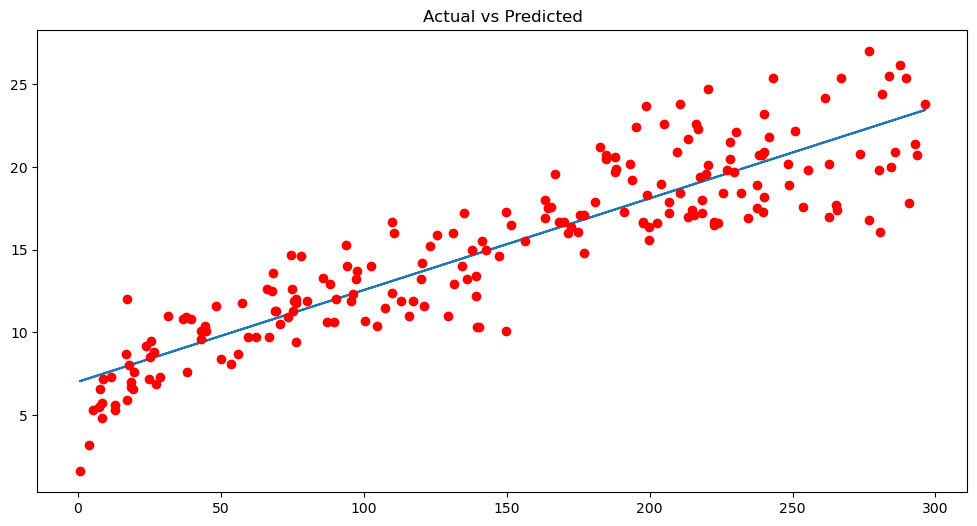

In [9]:
all_y_pred = model.predict(X)
plt.figure(figsize=(12, 6))
plt.plot(X, all_y_pred)  # Regression line
plt.plot(X, y, 'ro')  # Scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xticks(np.arange(min(X), max(X)+1, 1), [str(x) for x in np.arange(min(X), max(X)+1, 1)]) 
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show() 

In [10]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mean_for_simple = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
score_for_simple = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 6.10
Coefficient of determination: 0.80


In [11]:
#Spliting the data for multiple linear regression
#Sliting the dataset
X = df.iloc[:, :-1]
y = df.iloc[:, 3]
#Spliting the dataset as train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.25,random_state = 42)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
#Building a model for multiple linear regression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
y_pred = model.predict(X_test)
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = 4.714126402214134
w = [0.05450927 0.10094536 0.00433665]


In [14]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mean_for_multiple = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
score_for_multiple = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 2.91
Coefficient of determination: 0.91


In [15]:
#Comparison
print("Mean squared error for simple linear regression is: {}\nMean squared error for multiple linear regression is: {}".format(mean_for_simple, mean_for_multiple))
#The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination for simple linear regression is: {}\nCoefficient of determination for multiple linear regression is: {}".format(score_for_simple, score_for_multiple))

Mean squared error for simple linear regression is: 6.101072906773964
Mean squared error for multiple linear regression is: 2.907756910271091
Coefficient of determination for simple linear regression is: 0.802561303423698
Coefficient of determination for multiple linear regression is: 0.9059011844150826


## Task 3:

To develop the best medical insurance products, the insurer needs access to historical data to approximate the medical costs of each user. With this data, a medical insurer can develop more accurate pricing models, plan a particular insurance outcome. For all these cases, the objective is to accurately predict insurance costs.

![alt text](img/health_insurance.jpg "Health Insurance")


#### Dataset
You are provided with a dataset in the **dataset/04-insurance_charges.csv** file that contains medical insurance records. The individual medical costs billed by health insurance are the target variable charges, and the rest of columns contain personal information such as age, gender, family status, and whether the patient smokes among other features.
The following is the description of the features contained in the dataset: 
- **age:** age of primary beneficiary
- **sex:** insurance contractor gender, female, male
- **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **children:** Number of children covered by health insurance / Number of dependents
- **smoker:** Smoking
- **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges:** Individual medical costs billed by health insurance

#### Use Case
The objective is to train a ML regression model that can accurately predict the insurance costs for a given individual



In [16]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
#Reading data
df = pd.read_csv('05-insurance_charges.csv')

In [18]:
#Exploring data
df.shape

(1338, 7)

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
df = df.drop('sex', axis=1)
df = df.drop('smoker', axis=1)
df = df.drop('region' ,axis=1)
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [22]:
#Splitting the data into training and test sets
X = df.iloc[:, :-1]
y = df.iloc[:,df.shape[1]-1]
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
#Building a model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
#Using the model to make predictions for the test data set
y_pred = model.predict(X_test)

In [27]:
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = -6741.311004994182
w = [232.94484616 332.38291914 654.79960293]


In [28]:
#Evaluating a model
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 131677690.17
Coefficient of determination: 0.13


In [29]:
data = {
'age':[19],
'bmi': [27.900],
'children':[0],
}

data = pd.DataFrame(data)
val = model.predict(data)
print(val)

[6958.12451593]
